In [1]:
!apt-get install graphviz libgraphviz-dev
!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 

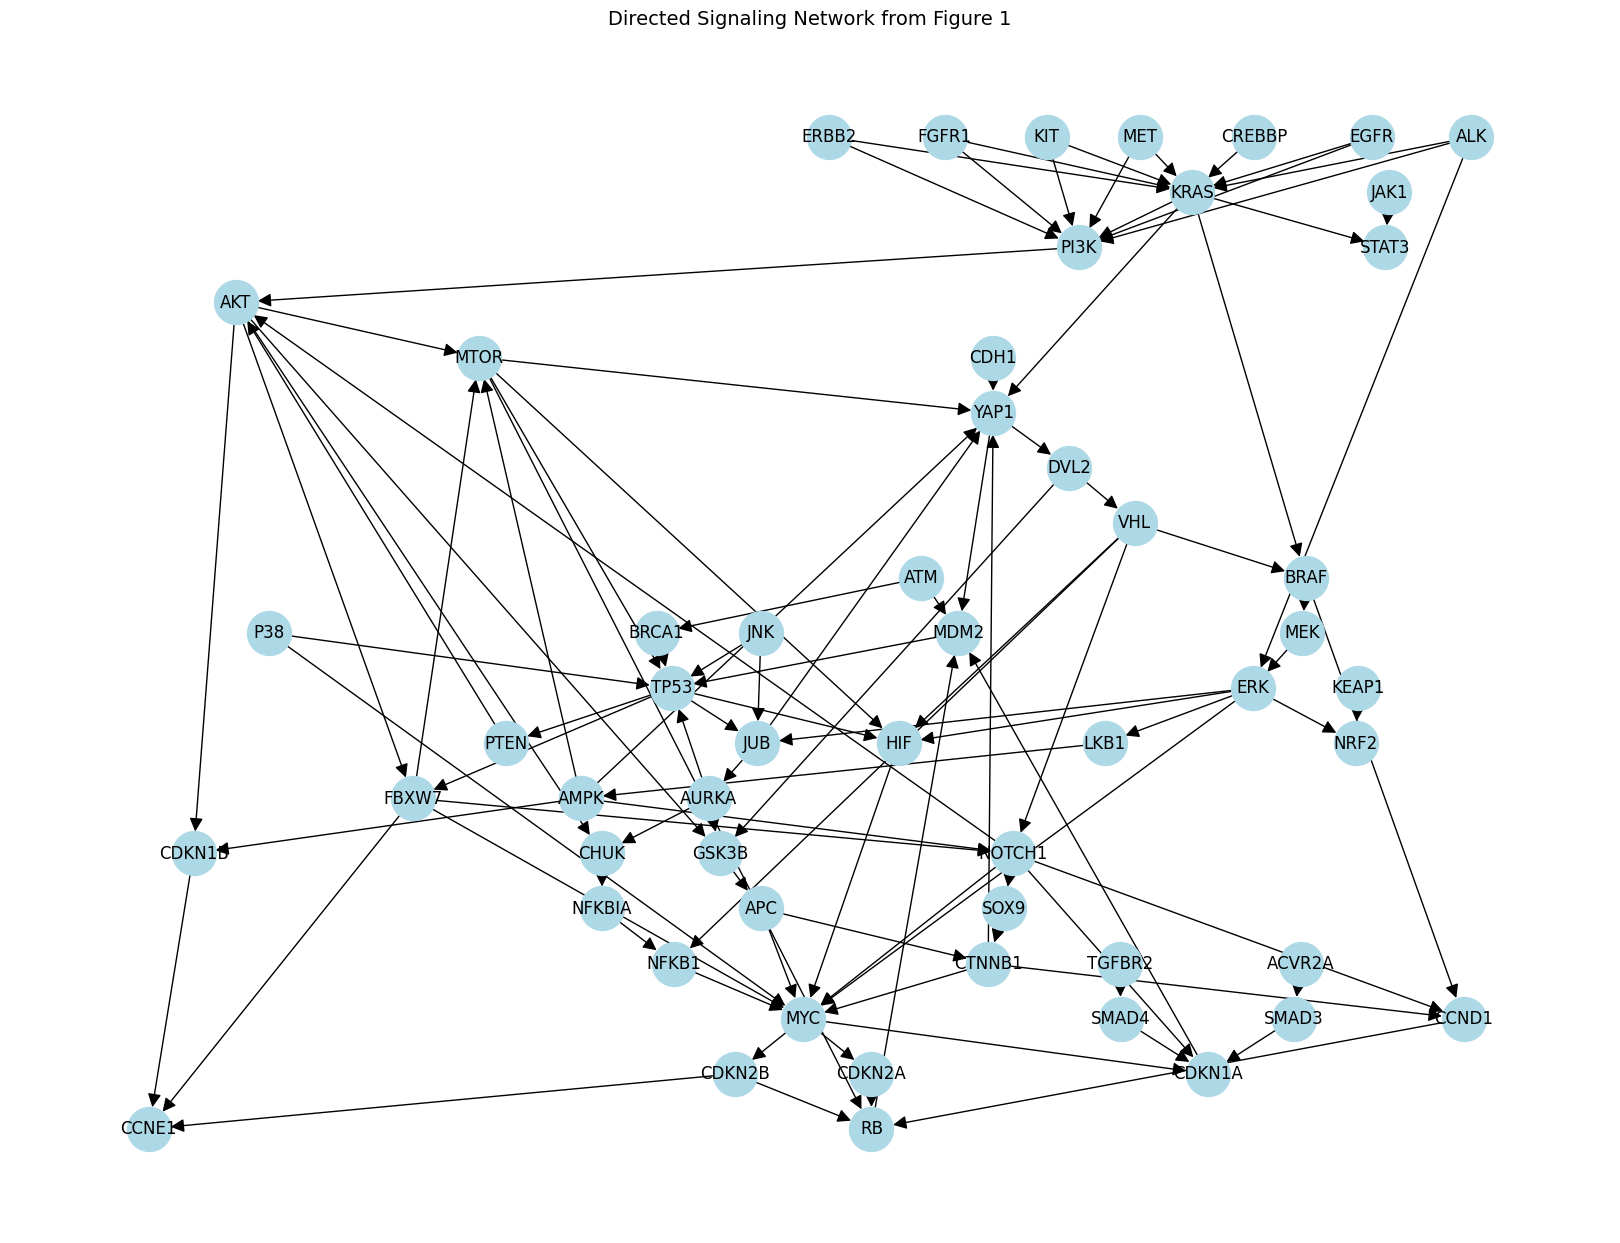

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Only needed once
# pip install pygraphviz  (or: pip install pydot && sudo apt install graphviz)

from networkx.drawing.nx_agraph import graphviz_layout

# Create graph
G = nx.DiGraph()

edges = edges = [
    ("EGFR", "KRAS"), ("ERBB2", "KRAS"), ("FGFR1", "KRAS"), ("CREBBP", "KRAS"),
    ("KRAS", "STAT3"), ("KRAS", "YAP1"), ("KRAS", "PI3K"), ("EGFR", "PI3K"),
    ("ERBB2", "PI3K"), ("FGFR1", "PI3K"), ("JAK1", "STAT3"), ("ERK", "MYC"),
    ("KIT", "KRAS"), ("MET", "KRAS"), ("ALK", "KRAS"), ("ACVR2A", "SMAD3"),
    ("KIT", "PI3K"), ("MET", "PI3K"), ("ALK", "PI3K"), ("PI3K", "AKT"),
    ("AKT", "MTOR"), ("MTOR", "TP53"), ("PTEN", "AKT"), ("AKT", "CHUK"),
    ("AKT", "CDKN1B"), ("ERK", "JUB"), ("NOTCH1", "AKT"), ("AMPK", "CDKN1B"),
    ("CDKN1B", "CCNE1"), ("CDKN2B", "CCNE1"), ("FBXW7", "CCNE1"),
    ("VHL", "BRAF"), ("FBXW7", "MYC"), ("KRAS", "BRAF"), ("BRAF", "MEK"),
    ("MEK", "ERK"), ("ALK", "ERK"), ("ERK", "LKB1"), ("LKB1", "AMPK"),
    ("TP53", "PTEN"), ("BRCA1", "TP53"), ("MDM2", "TP53"), ("TP53", "FBXW7"),
    ("YAP1", "MDM2"), ("JNK", "JUB"), ("CTNNB1", "YAP1"), ("JNK", "TP53"),
    ("ATM", "BRCA1"), ("TP53", "JUB"), ("P38", "TP53"), ("P38", "MYC"),
    ("TP53", "HIF"), ("AURKA", "TP53"), ("ATM", "MDM2"), ("JUB", "YAP1"),
    ("AMPK", "YAP1"), ("AMPK", "MTOR"), ("AMPK", "NOTCH1"), ("YAP1", "DVL2"),
    ("DVL2", "VHL"), ("DVL2", "GSK3B"), ("CDH1", "YAP1"), ("APC", "CTNNB1"),
    ("CTNNB1", "CCND1"), ("BRAF", "CCND1"), ("NOTCH1", "CCND1"),
    ("AURKA", "CHUK"), ("CCND1", "RB"), ("TGFBR2", "SMAD4"), ("SMAD4", "CDKN1A"),
    ("SMAD3", "CDKN1A"), ("CDKN2A", "RB"), ("MYC", "CDKN2A"), ("RB", "MDM2"),
    ("MTOR", "RB"), ("KEAP1", "NRF2"), ("ERK", "NRF2"), ("VHL", "HIF"),
    ("CHUK", "NFKBIA"), ("NFKBIA", "NFKB1"), ("VHL", "NFKB1"), ("NFKB1", "MYC"),
    ("MTOR", "HIF"), ("FBXW7", "MTOR"), ("AKT", "FBXW7"), ("ERK", "HIF"),
    ("HIF", "MYC"), ("VHL", "NOTCH1"), ("FBXW7", "NOTCH1"), ("NOTCH1", "CDKN1A"),
    ("NOTCH1", "SOX9"), ("SOX9", "CTNNB1"), ("CTNNB1", "MYC"), ("APC", "MYC"),
    ("CDKN2B", "RB"), ("MYC", "CDKN2B"), ("MYC", "CDKN1A"), ("AURKA", "GSK3B"),
    ("MTOR", "YAP1"), ("JUB", "AURKA"), ("CDKN1A", "MDM2"), ("GSK3B", "APC"),
    ("AKT", "GSK3B"), ("NOTCH1", "MYC")
]



G.add_edges_from(edges)

# Use a better layout
pos = graphviz_layout(G, prog="dot")  # 'dot' is best for hierarchy

# Draw
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', arrowsize=20)
plt.title("Directed Signaling Network from Figure 1", fontsize=14)
plt.show()


In [4]:
!pip install ace-tools

In [21]:
import networkx as nx
import pandas as pd

# Load the LUSC expression matrix
expression_file_path = "/content/sample_data/TCGA.LUSC.sampleMap_HiSeqV2"
expression_df = pd.read_csv(expression_file_path, sep="\t", index_col=0)

# Step 1: Clean gene names and ensure graph consistency
G = nx.DiGraph()
edges = [
    ("EGFR", "KRAS"), ("ERBB2", "KRAS"), ("FGFR1", "KRAS"), ("CREBBP", "KRAS"),
    ("KRAS", "STAT3"), ("KRAS", "YAP1"), ("KRAS", "PI3K"), ("EGFR", "PI3K"),
    ("ERBB2", "PI3K"), ("FGFR1", "PI3K"), ("JAK1", "STAT3"), ("ERK", "MYC"),
    ("KIT", "KRAS"), ("MET", "KRAS"), ("ALK", "KRAS"), ("ACVR2A", "SMAD3"),
    ("KIT", "PI3K"), ("MET", "PI3K"), ("ALK", "PI3K"), ("PI3K", "AKT"),
    ("AKT", "MTOR"), ("MTOR", "TP53"), ("PTEN", "AKT"), ("AKT", "CHUK"),
    ("AKT", "CDKN1B"), ("ERK", "JUB"), ("NOTCH1", "AKT"), ("AMPK", "CDKN1B"),
    ("CDKN1B", "CCNE1"), ("CDKN2B", "CCNE1"), ("FBXW7", "CCNE1"),
    ("VHL", "BRAF"), ("FBXW7", "MYC"), ("KRAS", "BRAF"), ("BRAF", "MEK"),
    ("MEK", "ERK"), ("ALK", "ERK"), ("ERK", "LKB1"), ("LKB1", "AMPK"),
    ("TP53", "PTEN"), ("BRCA1", "TP53"), ("MDM2", "TP53"), ("TP53", "FBXW7"),
    ("YAP1", "MDM2"), ("JNK", "JUB"), ("CTNNB1", "YAP1"), ("JNK", "TP53"),
    ("ATM", "BRCA1"), ("TP53", "JUB"), ("P38", "TP53"), ("P38", "MYC"),
    ("TP53", "HIF"), ("AURKA", "TP53"), ("ATM", "MDM2"), ("JUB", "YAP1"),
    ("AMPK", "YAP1"), ("AMPK", "MTOR"), ("AMPK", "NOTCH1"), ("YAP1", "DVL2"),
    ("DVL2", "VHL"), ("DVL2", "GSK3B"), ("CDH1", "YAP1"), ("APC", "CTNNB1"),
    ("CTNNB1", "CCND1"), ("BRAF", "CCND1"), ("NOTCH1", "CCND1"),
    ("AURKA", "CHUK"), ("CCND1", "RB"), ("TGFBR2", "SMAD4"), ("SMAD4", "CDKN1A"),
    ("SMAD3", "CDKN1A"), ("CDKN2A", "RB"), ("MYC", "CDKN2A"), ("RB", "MDM2"),
    ("MTOR", "RB"), ("KEAP1", "NRF2"), ("ERK", "NRF2"), ("VHL", "HIF"),
    ("CHUK", "NFKBIA"), ("NFKBIA", "NFKB1"), ("VHL", "NFKB1"), ("NFKB1", "MYC"),
    ("MTOR", "HIF"), ("FBXW7", "MTOR"), ("AKT", "FBXW7"), ("ERK", "HIF"),
    ("HIF", "MYC"), ("VHL", "NOTCH1"), ("FBXW7", "NOTCH1"), ("NOTCH1", "CDKN1A"),
    ("NOTCH1", "SOX9"), ("SOX9", "CTNNB1"), ("CTNNB1", "MYC"), ("APC", "MYC"),
    ("CDKN2B", "RB"), ("MYC", "CDKN2B"), ("MYC", "CDKN1A"), ("AURKA", "GSK3B"),
    ("MTOR", "YAP1"), ("JUB", "AURKA"), ("CDKN1A", "MDM2"), ("GSK3B", "APC"),
    ("AKT", "GSK3B"), ("NOTCH1", "MYC")
]
G.add_edges_from(edges)

# Alias mapping: standardizing expression data to match graph naming
alias_mapping = {
    "STK11":"LKB1",
    "RB1": "RB",
    "PIK3CA": "PI3K",
    "PRKAA1": "AMPK",
    "AKT1": "AKT",
    "HIF1A": "HIF",
    "MAPK1": "ERK",
    "NFE2L2": "NRF2"
}

# Step 1: Rename expression data rows based on aliases
expression_df_renamed = expression_df.copy()
expression_df_renamed.index = expression_df_renamed.index.to_series().replace(alias_mapping)

# Step 2: Find common genes in graph and expression data (after alias fix)
graph_genes = set(G.nodes)
expression_genes = set(expression_df_renamed.index)
common_genes = list(graph_genes & expression_genes)

# Step 3: Filter expression matrix to only those genes
filtered_expression_df = expression_df_renamed.loc[common_genes]


filtered_expression_df.to_csv("LUSC_filtered_expression.csv")


In [22]:
import pandas as pd

# Load  OncoDB file
lusc_onco_path = "/content/sample_data/LUSC_Differential_Gene_Expression_Table.txt"
onco_df = pd.read_csv(lusc_onco_path, sep="\t")


# Clean: Remove missing or duplicate gene symbols if needed
onco_df = onco_df.dropna(subset=["Gene symbol", "Normal Sample Med"])
onco_df = onco_df.drop_duplicates(subset=["Gene symbol"])

# Alias mapping: Map expression/OncoDB names to graph names
alias_mapping = {
    "STK11":"LKB1",
    "RB1": "RB",
    "PIK3CA": "PI3K",
    "PRKAA1": "AMPK",
    "AKT1": "AKT",
    "HIF1A": "HIF",
    "MAPK1": "ERK",
    "NFE2L2": "NRF2"
}

# Apply alias mapping to gene symbols
onco_df["Gene symbol"] = onco_df["Gene symbol"].replace(alias_mapping)

# ✅ Apply log2(x + 1) transformation to Normal Sample Med
onco_df["Normal Sample Med"] = np.log2(onco_df["Normal Sample Med"] + 1)

# Create dictionary: {Gene symbol → Normal Sample Med}
onco_normal_medians = pd.Series(
    onco_df["Normal Sample Med"].values,
    index=onco_df["Gene symbol"]
).to_dict()

In [23]:
# Manual alias fix for LKB1 from STK11
if "STK11" in onco_normal_medians:
    onco_normal_medians["LKB1"] = onco_normal_medians["STK11"]


In [10]:
onco_normal_medians

{'MIR6859-1': 1.5225579928704367,
 'MIR6859-2': 1.0,
 'FAM87B': 1.0,
 'LINC00115': 1.0,
 'FAM41C': 1.0,
 'LINC02593': 1.8339020766691634,
 'SAMD11': 1.5350575948948422,
 'NOC2L': 5.613855751426398,
 'KLHL17': 2.035975743665129,
 'PLEKHN1': 1.0,
 'PERM1': 1.0,
 'HES4': 3.253838032409076,
 'ISG15': 6.906565952700622,
 'AGRN': 6.339279936675138,
 'RNF223': 1.2308178418610831,
 'C1orf159': 2.997473071970961,
 'LINC01342': 1.0,
 'MIR200B': 1.0,
 'MIR200A': 1.0,
 'MIR429': 1.6059683588414584,
 'TTLL10': 2.0068365773966583,
 'TNFRSF18': 2.1538053360790355,
 'TNFRSF4': 3.3485157172354465,
 'SDF4': 7.403548938646195,
 'B3GALT6': 4.207268173112029,
 'C1QTNF12': 1.0,
 'UBE2J2': 5.319003675454544,
 'SCNN1D': 1.0854246562526777,
 'ACAP3': 4.125320473714413,
 'MIR6726': 1.0,
 'PUSL1': 3.2821432287814982,
 'INTS11': 6.1378518597578635,
 'CPTP': 4.751303031896141,
 'TAS1R3': 1.0,
 'DVL1': 5.36053986165181,
 'MXRA8': 6.262151236256654,
 'AURKAIP1': 6.95327688111636,
 'CCNL2': 5.561753809833983,
 'MRPL2

In [24]:
# Alias mapping: for expression + median lookup only
alias_lookup = {
    "STK11":"LKB1",
    "RB1": "RB",
    "PIK3CA": "PI3K",
    "PRKAA1": "AMPK",
    "AKT1": "AKT",
    "HIF1A": "HIF",
    "MAPK1": "ERK",
    "NFE2L2": "NRF2"
}



In [25]:


def compute_pk(E_x, E_y, E_x_n, E_y_n):
    """
    Computes probability p_k for a directed edge (u → v).
    """
    numerator = E_y*(E_x - E_x_n)  + E_x*(E_y - E_y_n)
    denominator = E_y*(E_x + E_x_n)  + E_x*(E_y + E_y_n)
    return numerator / denominator if denominator != 0 else 0

def compute_pathway_entropy(source_gene, target_gene, G, expression_df, normal_medians, alias_lookup=None):
    """
    Compute entropy for all patients between a source and target gene.
    Uses aliases only for expression & median lookup, not for graph traversal.
    """
    if alias_lookup is None:
        alias_lookup = {}

    try:
        paths = list(nx.all_simple_paths(G, source=source_gene, target=target_gene))
    except nx.NetworkXNoPath:
        print(f"No paths found between {source_gene} and {target_gene}")
        return [np.nan] * expression_df.shape[1]

    entropy_values = []

    for sample in expression_df.columns:
        path_probs = []
        for path in paths:
            p_k_list = []
            for u, v in zip(path[:-1], path[1:]):
                u_lookup = alias_lookup.get(u, u)
                v_lookup = alias_lookup.get(v, v)
                try:
                    E_u = expression_df.at[u_lookup, sample]
                    E_v = expression_df.at[v_lookup, sample]
                    E_u_n = normal_medians[u_lookup]
                    E_v_n = normal_medians[v_lookup]
                    p_k = compute_pk(E_u, E_v, E_u_n, E_v_n)
                    p_k_list.append(p_k)
                except KeyError:
                    continue
            if p_k_list:
               p_j = 1 - np.prod([1 - p_k for p_k in p_k_list])
            path_probs.append(p_j)




        if path_probs:
            n_i = len(path_probs)
            entropy = -1 / (1 + np.log(n_i)) * sum(p * np.log(p) for p in path_probs if p > 0)
            entropy_values.append(entropy)
        else:
            entropy_values.append(np.nan)

    return entropy_values


In [26]:
# Define gene aliases (expression table and OncoDB have these)
import numpy as np
{   "STK11":"LKB1",
    "RB1": "RB",
    "PIK3CA": "PI3K",
    "PRKAA1": "AMPK",
    "AKT1": "AKT",
    "HIF1A": "HIF",
    "MAPK1": "ERK",
    "NFE2L2": "NRF2"
}

pathways = {
    # Cell Cycle
    "CellCycle_KRAS_RB": ("KRAS", "RB1"),
    "CellCycle_MTOR_RB": ("MTOR", "RB1"),
    "CellCycle_TGFBR2_RB": ("TGFBR2", "RB1"),

    # Metabolism
    "Metab_ERK_AMPK": ("ERK", "AMPK"),
    "Metab_VHL_HIF": ("VHL", "HIF"),
    "Metab_BRAF_NFE2L2": ("BRAF", "NFE2L2"),

    # RTK-AKT
    "RTK_EGFR_AKT": ("EGFR", "AKT"),
    "RTK_MET_AKT": ("MET", "AKT"),
    "RTK_ALK_AKT": ("ALK", "AKT")
}


# Map aliases → canonical graph gene names
updated_pathways = {
    label: (alias_mapping.get(src, src), alias_mapping.get(tgt, tgt))
    for label, (src, tgt) in pathways.items()
}


entropy_results = {}

for label, (src, tgt) in updated_pathways.items():
    print(f"→ Computing entropy for {label}: {src} → {tgt}")
    entropy_results[label] = compute_pathway_entropy(src, tgt, G, filtered_expression_df, onco_normal_medians)


→ Computing entropy for CellCycle_KRAS_RB: KRAS → RB
→ Computing entropy for CellCycle_MTOR_RB: MTOR → RB
→ Computing entropy for CellCycle_TGFBR2_RB: TGFBR2 → RB
→ Computing entropy for Metab_ERK_AMPK: ERK → AMPK
→ Computing entropy for Metab_VHL_HIF: VHL → HIF
→ Computing entropy for Metab_BRAF_NFE2L2: BRAF → NRF2
→ Computing entropy for RTK_EGFR_AKT: EGFR → AKT
→ Computing entropy for RTK_MET_AKT: MET → AKT
→ Computing entropy for RTK_ALK_AKT: ALK → AKT


In [27]:
# Make a DataFrame (rows = patients, cols = 9 pathway labels)
entropy_df = pd.DataFrame(entropy_results)

# Use patient IDs from expression matrix
entropy_df.index = filtered_expression_df.columns
entropy_df.index.name = "patient_id"
# Save the file
entropy_df.to_csv("LUSC_9Pathway_Entropy.csv")
